In [1]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import os
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets('/tmp/tensorflow/mnist/input_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz


In [3]:
# Create the model

In [4]:
# 0부터 9까지 10개의 클래스

In [5]:
nb_classes = 10

In [6]:
# tensorflow graph input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28 * 28 = 784
W = tf.Variable(tf.zeros([784, nb_classes]))
b = tf.Variable(tf.zeros([nb_classes]))
y = tf.nn.softmax(tf.matmul(x, W)+b)

In [7]:
# cross-entrophy 모델 설정

In [8]:
y_ = tf.placeholder(tf.float32, [None, nb_classes])
learning_rate = 0.5
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In [9]:
# 모델 학습

In [10]:
# y, y_의 arg_max 값이 같은지 True, False로 확인

In [11]:
is_correct = tf.equal(tf.arg_max(y, 1), tf.arg_max(y_, 1))

In [12]:
# Accuracy 계산
# is_correct를 float 형으로 바꾸어 평균 계산

In [13]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [14]:
training_epochs = 20
batch_size = 100

Epoch: 0001 cost=  0.400694
Epoch: 0002 cost=  0.310156
Epoch: 0003 cost=  0.294095
Epoch: 0004 cost=  0.286841
Epoch: 0005 cost=  0.281211
Epoch: 0006 cost=  0.277339
Epoch: 0007 cost=  0.274427
Epoch: 0008 cost=  0.271445
Epoch: 0009 cost=  0.269603
Epoch: 0010 cost=  0.267307
Epoch: 0011 cost=  0.266410
Epoch: 0012 cost=  0.264666
Epoch: 0013 cost=  0.262866
Epoch: 0014 cost=  0.262170
Epoch: 0015 cost=  0.260775
Epoch: 0016 cost=  0.259445
Epoch: 0017 cost=  0.258885
Epoch: 0018 cost=  0.258445
Epoch: 0019 cost=  0.256971
Epoch: 0020 cost=  0.256920
Traing Finish
Accuracy: 0.9251
Label: [7]
Prediction: [7]


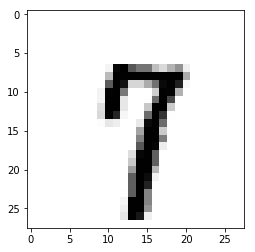

/Users/Eddy/Dropbox/Python/MNIST_Project
Model saved in file:  ./mnist_softmax.ckpt


In [19]:
# 세션 열기
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Training Cycle
    # 15번 학습
    
    for epoch in range(training_epochs):
        avg_cost = 0
        
        # 전체 Size를 batch_size fh wkffktj gkrtmq
        # 한번에 몇 개씩 학습할 것인지 설정
        total_batch = int(mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            # x_data, y_data
            batch_xs, batch__ys = mnist.train.next_batch(batch_size)
            #cost 계산
            c,_ = sess.run([cross_entropy, train_step], feed_dict={x:batch_xs, y_:batch__ys})
            # batch_size만큼 나눠서 avg_cost의 합 계산
            avg_cost += c/total_batch
            
        print('Epoch:', '%04d' % (epoch+1), 'cost=', '{:9f}'.format(avg_cost))
        
    print("Traing Finish")
    print("Accuracy:", accuracy.eval(session= sess, feed_dict={x: mnist.test.images, y_:mnist.test.labels}))

    # Random 숫자 읽기
    r = random.randint(0, mnist.test.num_examples-1)

     # Test할 data 숫자 읽기
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    
    # Hypothesis 대립
    print("Prediction:", sess.run(tf.argmax(y, 1), feed_dict={x:mnist.test.images[r:r+1]}))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys', interpolation= 'nearest')
    plt.show()
    
    # 모델 저장
    saver = tf.train.Saver()
    save_path = saver.save(sess, "./mnist_softmax.ckpt")


    print (os.getcwd())
    print("Model saved in file: ", save_path)